In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats

sys.path.append('..')
#from src.data.make_dataset import df
from src.features.build_features import df
    #    dict(zip(*np.unique(df['Tekst'][0], return_counts=True)))

from src.features.func import remove_words, read_txt_file

In [11]:
df['Rolle'].value_counts()

formand                171720
medlem                 130976
minister                29326
fungerende minister       145
aldersformanden            16
midlertidig formand        13
Name: Rolle, dtype: int64

## President of Parliament (Formand) rule in the dataset
The rule of the President of Parliament is to ensure ....

96.2561146051712% of the President of Parliaments speches is less than or equal 25 words (not including stop words)
3.743885394828791% the President of Parliaments speches is more than 25 words (not including stop words


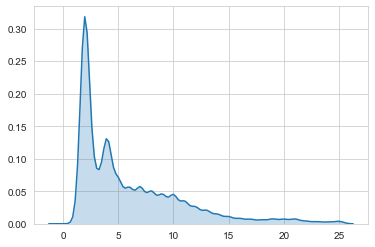

In [12]:
formand_length_speech = df[df['Rolle'] == 'formand']['Tekst'].apply(len).values

print('{}% of the President of Parliaments speches is less than or equal 25 words (not including stop words)'.format(100*sum(formand_length_speech < 25)/171720))
print('{}% the President of Parliaments speches is more than 25 words (not including stop words'.format(100*sum(formand_length_speech >= 25)/171720 ))

sns.kdeplot(formand_length_speech[formand_length_speech <= 25], shade=True)

In [27]:
# Remove istan
df1 = df[(df['Rolle'] != 'formand') & (df['Rolle'] != 'aldersformanden') & (df['Rolle'] != 'midlertidig formand ')].reset_index()

# Remove instances where the text length is = 
df2 = df1[df1['Tekst'].apply(len).values != 0].reset_index(drop=True)

In [38]:
sample = np.random.choice(10000, df2.shape[0])
df2_sample = df2.iloc[sample]

In [15]:
df1

,index,Starttid,Sluttid,Navn,Rolle,Tekst,MeetingId,Parti,Regering
0,2,2009-10-06 12:04:01.713,2009-10-06 12:11:14.713,Lars Løkke Rasmussen,minister,"[danmark, land, lev, vi, byg, rigt, samfund, f...",2A762CE9-E5C1-4C4C-A5B9-87994C68C257,V,0Lars1
1,3,2009-10-06 12:11:14.713,2009-10-06 12:14:49.713,Lars Løkke Rasmussen,minister,"[det, mul, grib, for, verd, virk, mød, kris, f...",2A762CE9-E5C1-4C4C-A5B9-87994C68C257,V,0Lars1
2,4,2009-10-06 12:14:49.713,2009-10-06 12:19:47.713,Lars Løkke Rasmussen,minister,"[for, først, –, afgørende:, vi, hold, fast, an...",2A762CE9-E5C1-4C4C-A5B9-87994C68C257,V,0Lars1
3,5,2009-10-06 12:19:47.713,2009-10-06 12:25:11.713,Lars Løkke Rasmussen,minister,"[velstand, vækst, virk, byggest, byg, velfærds...",2A762CE9-E5C1-4C4C-A5B9-87994C68C257,V,0Lars1
4,6,2009-10-06 12:25:11.713,2009-10-06 12:29:01.713,Lars Løkke Rasmussen,minister,"[regering, arbejd, hel, velfærdsområd, sæt, pa...",2A762CE9-E5C1-4C4C-A5B9-87994C68C257,V,0Lars1
...,...,...,...,...,...,...,...,...,...
160455,332184,2016-09-06 19:40:12.173,2016-09-06 19:41:18.513,Claus Hjort Frederiksen,minister,"[jeg, rigt, tror, pædagogisk, evn, opbrug, omr...",8CB2C3AA-E0E7-44B1-8C38-03BAAE3657E3,V,Lars2
160456,332186,2016-09-06 19:41:19.967,2016-09-06 19:42:01.727,Karin Gaardsted,medlem,"[nu, finansminist, kør, tog, jeg, anels, alver...",8CB2C3AA-E0E7-44B1-8C38-03BAAE3657E3,S,Lars2
160457,332188,2016-09-06 19:42:02.653,2016-09-06 19:42:15.567,Claus Hjort Frederiksen,minister,"[det, desvær, husk, men, men, talt, tror, mød,...",8CB2C3AA-E0E7-44B1-8C38-03BAAE3657E3,V,Lars2
160458,332190,2016-09-06 19:42:45.317,2016-09-06 19:48:51.097,Pelle Dragsted,medlem,"[tak, det, finansminist, bemærkning, energiaft...",8CB2C3AA-E0E7-44B1-8C38-03BAAE3657E3,EL,Lars2


In [39]:
words, count = np.unique(
    np.concatenate(
        df2_sample['Tekst'].to_numpy().ravel()
    ), return_counts = True
)
count_sorted = np.argsort(-count)
words = words[count_sorted]
count = count[count_sorted]

In [40]:
def create_additional_stopwords(sorted_words, word_count_threshold = 50):
    manuel_word_list = ['det', 'jeg', '', '-', 'altså', 'så', 'der', 'i', 'a', 'f', '000', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    words_below_threshold = words[count <= word_count_threshold].tolist()

    words_not_to_include = manuel_word_list + words_below_threshold

    with open('additional_word_to_be_removed.txt', 'w') as f:
        for item in words_not_to_include:
            f.write("%s\n" % item)
    

In [41]:
df2_sample.apply(remove_words, stopwords=read_txt_file('additional_word_to_be_removed.txt'))

KeyboardInterrupt: 